In [0]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import shutil
from sklearn.decomposition import FastICA, PCA
from matplotlib.lines import Line2D

from matplotlib import style
style.use("ggplot")
from sklearn import svm

In [15]:
#Absolute path is dependent on where the user has stored the files in his or her local machine
sub = sorted(glob.glob("/content/drive/My Drive/Spark-2019 (1)/RECSEM2019/EEG Network/Sub-cof-?.txt")) + sorted(glob.glob("/content/drive/My Drive/Spark-2019 (1)/RECSEM2019/EEG Network/Sub-cof-??.txt"))
sub = [x[49:-4] for x in sub]

['/EEG Network/Sub-cof-0', '/EEG Network/Sub-cof-1', '/EEG Network/Sub-cof-2', '/EEG Network/Sub-cof-3', '/EEG Network/Sub-cof-4', '/EEG Network/Sub-cof-5', '/EEG Network/Sub-cof-6', '/EEG Network/Sub-cof-7', '/EEG Network/Sub-cof-8', '/EEG Network/Sub-cof-9', '/EEG Network/Sub-cof-10', '/EEG Network/Sub-cof-11', '/EEG Network/Sub-cof-12', '/EEG Network/Sub-cof-13', '/EEG Network/Sub-cof-14', '/EEG Network/Sub-cof-15', '/EEG Network/Sub-cof-16', '/EEG Network/Sub-cof-17', '/EEG Network/Sub-cof-18', '/EEG Network/Sub-cof-19', '/EEG Network/Sub-cof-20', '/EEG Network/Sub-cof-21', '/EEG Network/Sub-cof-22', '/EEG Network/Sub-cof-23', '/EEG Network/Sub-cof-24', '/EEG Network/Sub-cof-25', '/EEG Network/Sub-cof-26', '/EEG Network/Sub-cof-27', '/EEG Network/Sub-cof-28', '/EEG Network/Sub-cof-29', '/EEG Network/Sub-cof-30', '/EEG Network/Sub-cof-31', '/EEG Network/Sub-cof-32', '/EEG Network/Sub-cof-33', '/EEG Network/Sub-cof-34', '/EEG Network/Sub-cof-35', '/EEG Network/Sub-cof-36', '/EEG Netw

In [68]:
#old matrix
#Gather correlation data and rearrange it into a matrix
#This code is used to organize the data for calculating
#Eigenvalues, column means, and column norms
a=np.ones(30)
count = 0
for s in sub:
  with open("/content/drive/My Drive/Spark-2019 (1)/RECSEM2019/" + s + ".txt", 'r') as f:
    lines = f.readlines()[2:]
    for i in range(len(lines)):
        lines[i] = [float(x) for x in lines[i].split('|')[1:-1]]
#    if count == 0:
#      data= [np.asarray(lines)]
#      count += 1
#    else:
#      tmp = [np.asarray(lines)]
#      data=np.append(data,tmp,axis=0)
    
#print(data)
    #Calculate column means
    matrix = np.asarray(lines)
    meansMatrix=matrix.mean(0)
    a=np.vstack((a,meansMatrix)) 
    #a=np.append(a,matrix)
    #get the cof matrix together
a=a[1:,:]
print(a.shape)

#new matrix

(48, 30)


In [58]:
#Calculate eigenvalues for the matrix
eigvals = []
for i in range(len(data)):
  val, vec = np.linalg.eig(data[i])
  eigvals.append(np.abs(np.square(val)))
  
print(len(eigvals))

48


In [69]:
#svm model
x_fit=a

y_fit=[1]

NC_index = [5,6,7,8,10,11,12,13,14,15,21,22,23,28,35]
MCI_index = [2,3,9,17,18,19,24,25,26,27,29,30,31,32,37,46]
AD_index = [0,1,4,16,20,33,34,36,38,39,40,41,42,43,44,45,47]

for i in range(48):
  if i in NC_index:
    y_fit=np.vstack((y_fit,0))
  if i in MCI_index:
    y_fit=np.vstack((y_fit,1))
  if i in AD_index:
    y_fit=np.vstack((y_fit,2))
y_fit=y_fit[1:,:]
print(y_fit.shape)  
x_tmp=x_fit
y_tmp=y_fit
print(x_tmp[:2][0])


#loop through all the patients and classify using 
#SVM and leave-one-out principle
for i in range(48):
  
  print(i)
  if i == 0:
    x_fit=x_tmp[1:]
    y_fit=y_tmp[1:,:]
  elif i == 47:
    x_fit=x_tmp[:47]
    y_fit=y_tmp[:47,:]
  else:
    x_fit=np.vstack((x_tmp[i],x_tmp[i+1:]))
    y_fit=np.vstack((y_tmp[i,:],y_tmp[i+1:,:]))
  x_test=x_tmp[i].reshape(1,-1)
  y_test=y_tmp[i]
  print(y_test)
  model=svm.SVC()
  model.fit(x_fit,y_fit)
  #print(x_fit.shape, y_fit.shape,x_test.shape,y_test.shape)
  print(model.predict(x_test))
  

(48, 1)
[ 0.43157297  0.41546673  0.4781642   0.51307317 -0.11226377  0.51513343
  0.49287807  0.35568797  0.26182223 -0.32928563  0.59690403  0.5572837
  0.33099987  0.57643113  0.61697657  0.59099457  0.54748253  0.55572733
  0.5623416   0.32646667  0.5982113   0.23663883  0.55624227  0.59043803
  0.45018397  0.47539377  0.39082387  0.5459597   0.340005    0.3765497 ]
0
[2]
[1]
1
[2]
[2]
2
[1]
[1]
3
[1]
[1]
4
[2]
[0]
5
[0]
[0]
6
[0]
[0]
7
[0]
[2]
8
[0]
[1]
9
[1]
[1]
10
[0]
[2]
11
[0]
[2]
12
[0]
[2]
13
[0]
[2]
14
[0]
[2]
15
[0]
[2]
16
[2]
[2]
17
[1]
[1]
18
[1]
[2]
19
[1]
[2]
20
[2]
[2]
21
[0]
[2]
22
[0]
[2]
23
[0]
[2]
24
[1]
[2]
25
[1]
[2]
26
[1]
[2]
27
[1]
[2]
28
[0]
[2]
29
[1]
[2]
30
[1]
[2]
31
[1]
[2]
32
[1]
[2]
33
[2]
[2]
34
[2]
[2]
35
[0]
[2]
36
[2]
[2]
37
[1]
[2]
38
[2]
[2]
39
[2]
[2]
40
[2]
[2]
41
[2]
[2]
42
[2]
[2]
43
[2]
[2]
44
[2]
[2]
45
[2]
[2]
46
[1]
[1]
47
[2]
[1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better 

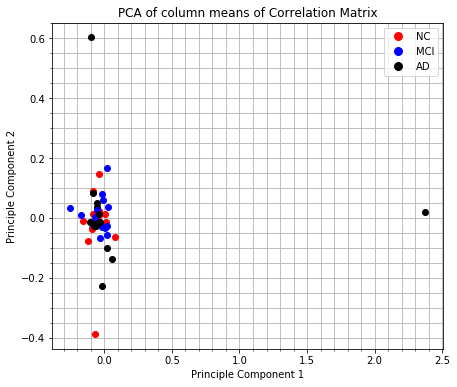

In [0]:
#Perform PCA on the eigenvalues/column means/column norms of the matrix
#Plot the two principle components and see if it is easily distinguishable
#to the eye
pca = PCA(n_components=2)
dataset = pca.fit_transform(a)
#print(dataset)
NC_index = [3,4,8,9,10,11,12,13,14,15,21,22,23,28,35]
MCI_index = [0,2,5,17,18,19,24,25,26,27,29,30,31,32,37,46]
AD_index = [1,6,7,16,20,33,34,36,38,39,40,41,42,43,44,45,47]
  
  
legend_elements = [Line2D([0], [0], marker='o', color='w', label='NC',
                          markerfacecolor='r', markersize=10), 
                   Line2D([0], [0], marker='o', color='w', label='MCI',
                          markerfacecolor='b', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='AD',
                          markerfacecolor='k', markersize=10)]
  
  
plt.figure()
plt.minorticks_on()
plt.grid(True, 'both')
for i,v in enumerate(dataset):

  if i in NC_index:
    plt.plot(v[0], v[1], 'ro') 
  elif i in MCI_index:
    plt.plot(v[0], v[1], 'bo')
  elif i in AD_index:
    plt.plot(v[0], v[1], 'ko')
    
plt.xlabel('Principle Component 1')
plt.ylabel('Principle Component 2') #for each component

plt.title('PCA of column means of Correlation Matrix')
plt.legend(handles=legend_elements, loc='upper right')
fig1 = plt.gcf()
fig1.set_size_inches(7, 6)
plt.show()
fig1.savefig('Correlation-PCA.png', bbox_inches='tight')